In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
# Visualization
import folium 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline 
# Clustering
from sklearn.cluster import KMeans

# Battle of the Neighborhoods: Seattle Neighborhood Clustering

## Link Reference:
1. Data Acqusition: 
2. ***Data Preparation, Exploration, and Analysis***
3. Report: https://github.com/JoeBattafarano/Battle-of-the-Neighborhoods/blob/master/Seattle-Neighborhood-Clustering.docx
4. Presentation: https://github.com/JoeBattafarano/Battle-of-the-Neighborhoods/blob/master/Seattle-Neighborhood-Clustering.pptx

## Data Preparation, Exploration, and Analysis:
* [Data Importing and Overview](#over)
* [Pricing and Rating Exploration](#PnRe)
* [K-Means Clustering - Neighborhoods](#neigh)
* [K-Means Clustering - Price and Rating](#PnR)

## Data Importing and Overview <a name='over'></a>

In [2]:
# Bringing in the Data:

#Seattle Neighborhoods
sn = pd.read_csv('sn.csv')
# Venue data
seattle_venues = pd.read_csv('seattle_venues.csv')
# 5 details' files 
seattle_venues_details_1 = pd.read_csv('first_seattle_venues_details.csv')
seattle_venues_details_2 = pd.read_csv('second_seattle_venues_details.csv')
seattle_venues_details_3 = pd.read_csv('third_seattle_venues_details.csv')
seattle_venues_details_4 = pd.read_csv('fourth_seattle_venues_details.csv')
seattle_venues_details_5 = pd.read_csv('fifth_seattle_venues_details.csv')
# Concat into one main
seattle_venues_details = pd.concat([seattle_venues_details_1,seattle_venues_details_2,seattle_venues_details_3,seattle_venues_details_4,seattle_venues_details_5], ignore_index=True)

In [3]:
# Remove unwanted column
seattle_venues_details.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
# Looks good so we shall merge the venues and their details via venue id
seattle_venues_complete = seattle_venues.merge(seattle_venues_details, on='id',how='left')
seattle_venues_complete.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
# Checking if each neighborhood returned venues
# It appears one Neighborhood did not return any venues
print('There are {} uniques venues.'.format(len(seattle_venues['Neighborhood'].unique())))
print('There are {} uniques venues.'.format(len(sn['Neighborhood'].unique())))

There are 118 uniques venues.
There are 119 uniques venues.


In [6]:
# Since they did not identifying which neighborhood did not return venues
venues_neighborhoods = seattle_venues['Neighborhood'].unique()
sn_neighborhoods = sn['Neighborhood'].unique()
np.in1d(sn_neighborhoods,venues_neighborhoods)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [7]:
# It happens to be element 98. Therefore, we shall remove it
sn.drop([98], inplace=True)
sn.reset_index(inplace=True,drop=True)
# Dropping unwanted columns:
seattle_venues.drop(['Unnamed: 0','id'],axis=1, inplace=True)
sn.drop(['Unnamed: 0'],axis=1, inplace=True)

# General Information:

In [8]:
# Neighborhoods
print('There are {} unique neighborhoods.'.format(len(sn['Neighborhood'].unique())))
# Venues
print('There are {} venues.'.format(len(seattle_venues_complete)))
print('There are {} unique venues.'.format(len(seattle_venues_complete['id'].unique())))
print('There are {} unique venue categories.'.format(len(seattle_venues_complete['Venue Category'].unique())))

There are 118 unique neighborhoods.
There are 3370 venues.
There are 2285 unique venues.
There are 311 unique venue categories.


# Price and Rating Exploration <a name='PnRe'></a>

In [9]:
# Used only unique venues so you don't repeat counts in  price and rating
seattle_venues_unique = seattle_venues_complete.drop_duplicates(subset = 'id')
seattle_venues_price = seattle_venues_unique[seattle_venues_unique['price'] != 0]
seattle_venues_rating = seattle_venues_unique[seattle_venues_unique['rating'] != 0.0]
seattle_venues_PnR = seattle_venues_price.merge(seattle_venues_rating, on='id', how='inner')
seattle_venues_PnR.drop(['Neighborhood_x','Neighborhood Latitude_x','Neighborhood Longitude_x','Venue_x','Venue Latitude_x','Venue Longitude_x','Venue Category_x','price_x','rating_x'],axis=1,inplace=True)
seattle_venues_PnR = seattle_venues_PnR.rename(columns={'Neighborhood_y':'Neighborhood','Neighborhood Latitude_y':'Neighborhood Latitude','Neighborhood Longitude_y':'Neighborhood Longitude','Venue_y':'Venue','Venue Latitude_y':'Venue Latitude','Venue Longitude_y':'Venue Longitude', 'Venue Category_y':'Venue Category','price_y':'Venue Price','rating_y':'Venue Rating','id':'Venue ID'})

## Price

In [ ]:
seattle_venues_price.groupby('price').count()

In [ ]:
# Obtaining the # of venues with each unique price tier
prices = [1,2,3,4]
price_totals = [613,492,94,12]

In [ ]:
# Price Tier Amounts
plt.xticks(prices)
plt.ylabel('Total Venues')
plt.xlabel('Price Tiers')
plt.title('Venue Price Tiers')
plt.bar(prices,price_totals)

## Rating

In [ ]:
# Looking and descriptive stats to identify skew and distribution
seattle_venues_rating.describe()

In [ ]:
# Rating Distribution
sns.distplot(seattle_venues_rating['rating'],hist=True)

## Pricing and Rating

In [ ]:
# Correlation
print(seattle_venues_PnR[['Venue Price','Venue Rating']].corr())

In [ ]:
# Descriptive Stats per price level
seattle_venues_PnR[['Venue Price','Venue Rating']].groupby('Venue Price').describe()

In [ ]:
# Price and Rating:
# This is a Probability Density Function (PDF) NOT a Cumulative Density Functions (CDF)
# Therefore the value can be greater than one given a small standard deviation
for price in prices:
    subset = seattle_venues_PnR[seattle_venues_PnR['Venue Price'] == price]
    sns.distplot(subset['Venue Rating'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                       label=price)
    plt.title('Rating Distribution across Price Tiers')
    plt.ylabel('Probability Density')

# K-Means Clustering - Neighborhoods <a name='neigh'></a>

In [ ]:
# One hot encoding:
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix=" ",prefix_sep="")

# Bring back Neighborhood
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood']

# Neighborhood as the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

#Quick look
seattle_onehot.head()

In [ ]:
# Group by neighborhood and take the mean frequency of each category
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped.head()

In [ ]:
# Double checking the shape
seattle_onehot.shape

In [10]:
# A function for sorting the venues in descending order based on their frequencies
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
# dataframe with the top ten venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [ ]:
# set number of clusters
kclusters = 5

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
# Bring data back together

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = sn

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.head()

In [ ]:
# Visualize Clusters
seattle_lat = 47.6062
seattle_long = -122.3321
map_clusters = folium.Map(location=[seattle_lat, seattle_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Lat'], seattle_merged['Long'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Looking at Each Cluster

In [ ]:
# Cluster 0:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

In [ ]:
# Cluster 1:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

In [ ]:
# Cluster 2:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

In [ ]:
# Cluster 3:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 3, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

In [ ]:
# Cluster 4:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 4, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

# K-Means Clustering - Pricing and Ratings <a name='PnR'></a>

In [11]:
# Get Venue Price Averages per Neighborhood
venue_price_avgs = seattle_venues_PnR.groupby('Neighborhood')['Venue Price'].mean()
seattle_venues_PnR = seattle_venues_PnR.merge(venue_price_avgs, on='Neighborhood', how = 'left')
seattle_venues_PnR = seattle_venues_PnR.rename(columns={'Venue Price_x':'Venue Price','Venue Price_y':'Venue Average Price'})

In [12]:
# Get Venue Rating Averages per Neighborhood
venue_rating_avgs = seattle_venues_PnR.groupby('Neighborhood')['Venue Rating'].mean().reset_index()
seattle_venues_PnR = seattle_venues_PnR.merge(venue_rating_avgs, on='Neighborhood', how = 'left')
seattle_venues_PnR = seattle_venues_PnR.rename(columns={'Venue Rating_x':'Venue Rating','Venue Rating_y':'Venue Average Rating'})

In [ ]:
seattle_venues_PnR

In [13]:
# One hot encoding:
seattle_onehot_PnR = pd.get_dummies(seattle_venues_PnR[['Venue Category']], prefix=" ",prefix_sep="")

# Bring back Neighborhood
seattle_onehot_PnR['Neighborhood'] = seattle_venues_PnR['Neighborhood']


# Neighborhood as the first column
fixed_columns = [seattle_onehot_PnR.columns[-1]] + list(seattle_onehot_PnR.columns[:-1])
seattle_onehot_PnR = seattle_onehot_PnR[fixed_columns]

#Quick look
seattle_onehot_PnR.head()

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
seattle_onehot_PnR.shape

In [14]:
# By Neighborhood
seattle_grouped_PnR = seattle_onehot_PnR.groupby('Neighborhood').mean().reset_index()
seattle_grouped_PnR

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Atlantic,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Ballard,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.250000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,Beacon Hill,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.100000,0.000000,...,0.1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,Belltown,0.0,0.035088,0.0,0.0000,0.0,0.0,0.0,0.070175,0.105263,...,0.0,0.0,0.0,0.017544,0.000000,0.0,0.017544,0.035088,0.000000,0.0
4,Bitter Lake,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.083333,0.000000,...,0.0,0.0,0.0,0.083333,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,West Seattle,0.0,0.200000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
78,Westlake,0.0,0.070175,0.0,0.0000,0.0,0.0,0.0,0.035088,0.017544,...,0.0,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.000000,0.017544,0.0
79,Whittier Heights,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.111111,0.111111,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.0
80,Windermere,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [15]:
# dataframe with the top ten venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_PnR = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_PnR['Neighborhood'] = seattle_grouped_PnR['Neighborhood']

for ind in np.arange(seattle_grouped_PnR.shape[0]):
    neighborhoods_venues_sorted_PnR.iloc[ind, 1:] = return_most_common_venues(seattle_grouped_PnR.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_PnR.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic,Food Truck,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
1,Ballard,Coffee Shop,French Restaurant,Bar,Food Truck,Wings Joint,Falafel Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop
2,Beacon Hill,Brewery,Bakery,Pub,Coffee Shop,Mexican Restaurant,Mediterranean Restaurant,Café,Taco Place,Pizza Place,Fried Chicken Joint
3,Belltown,Bar,Coffee Shop,Bakery,Italian Restaurant,Seafood Restaurant,Breakfast Spot,Sushi Restaurant,Lounge,Cocktail Bar,Restaurant
4,Bitter Lake,Fast Food Restaurant,Noodle House,Donut Shop,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Bakery,Sandwich Place,Seafood Restaurant


In [16]:
# Adding in additional pricing and rating data prior to clustering
seattle_grouped_PnR = seattle_grouped_PnR.merge(seattle_venues_PnR[['Neighborhood','Venue Average Price','Venue Average Rating']], on='Neighborhood', how='left').drop_duplicates().reset_index()
seattle_grouped_PnR.drop(['index'],axis=1,inplace=True)

In [17]:
# set number of clusters
kclusters = 5

seattle_grouped_clustering_PnR = seattle_grouped_PnR.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering_PnR)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 1, 4, 3, 0, 3, 4, 4, 4])

In [18]:
# Bring data back together

# add clustering labels
neighborhoods_venues_sorted_PnR.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged_PnR = seattle_venues_PnR[['Neighborhood','Venue Average Price','Venue Average Rating','Neighborhood Latitude','Neighborhood Longitude']].drop_duplicates().reset_index()
seattle_merged_PnR.drop(['index'], axis=1,inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged_PnR = seattle_merged_PnR.join(neighborhoods_venues_sorted_PnR.set_index('Neighborhood'), on='Neighborhood')

seattle_merged_PnR.head()

,Neighborhood,Venue Average Price,Venue Average Rating,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,1.636364,7.327273,47.660773,-122.291497,0,Burger Joint,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Food Truck,Donut Shop,Steakhouse,Pizza Place,Brewery
1,Broadview,1.500000,6.900000,47.722320,-122.360407,3,Pizza Place,Thai Restaurant,Food Truck,Sushi Restaurant,Wings Joint,Eastern European Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner
2,Bitter Lake,1.083333,7.216667,47.726236,-122.348764,3,Fast Food Restaurant,Noodle House,Donut Shop,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Bakery,Sandwich Place,Seafood Restaurant
3,Crown Hill,1.125000,7.037500,47.694715,-122.371459,3,Sports Bar,Taco Place,Coffee Shop,Sandwich Place,Mexican Restaurant,Burger Joint,Pizza Place,American Restaurant,Food Truck,Fish & Chips Shop
4,Greenwood,1.692308,7.869231,47.690981,-122.354877,4,Coffee Shop,Mexican Restaurant,Bar,Pizza Place,Brewery,Steakhouse,Mediterranean Restaurant,Diner,Lounge,Sandwich Place


In [19]:
# Visualize Clusters
seattle_lat = 47.6062
seattle_long = -122.3321
map_clusters = folium.Map(location=[seattle_lat, seattle_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged_PnR['Neighborhood Latitude'], seattle_merged_PnR['Neighborhood Longitude'], seattle_merged_PnR['Neighborhood'], seattle_merged_PnR['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Looking at each Cluster

In [21]:
# Cluster 0:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 0].head()

,Neighborhood,Venue Average Price,Venue Average Rating,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,1.636364,7.327273,47.660773,-122.291497,0,Burger Joint,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Food Truck,Donut Shop,Steakhouse,Pizza Place,Brewery
7,Pinehurst,1.738462,7.600000,47.603832,-122.330062,0,Coffee Shop,Café,Cocktail Bar,Sandwich Place,Japanese Restaurant,Italian Restaurant,Donut Shop,Salad Place,Sushi Restaurant,Pizza Place
9,Lake City,1.555556,7.483333,47.719162,-122.295494,0,Mexican Restaurant,Thai Restaurant,Sushi Restaurant,Sandwich Place,Burger Joint,Breakfast Spot,Chinese Restaurant,Bar,Gastropub,Café
13,Wedgwood,1.500000,7.400000,47.690253,-122.290811,0,Coffee Shop,Steakhouse,Pub,Gay Bar,Eastern European Restaurant,German Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner
14,Roosevelt,1.571429,7.414286,47.677305,-122.313807,0,Coffee Shop,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Burger Joint,Indian Restaurant,Bar,Breakfast Spot,Thai Restaurant,Pizza Place


In [22]:
# Cluster 1
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 1]

,Neighborhood,Venue Average Price,Venue Average Rating,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Windermere,1.000000,8.300000,47.670932,-122.261792,1,Pizza Place,Wings Joint,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
29,Central Seattle,1.000000,8.076923,47.612694,-122.303205,1,Coffee Shop,Burger Joint,Ice Cream Shop,Donut Shop,Taco Place,Bar,Food Truck,Deli / Bodega,Café,Ethiopian Restaurant
52,Yesler Terrace,1.500000,8.237500,47.601266,-122.319159,1,Vietnamese Restaurant,Chinese Restaurant,Noodle House,Asian Restaurant,Thai Restaurant,Wings Joint,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner
56,Atlantic,1.000000,7.800000,47.590493,-122.324313,1,Food Truck,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
61,Leschi,1.000000,8.100000,47.600535,-122.291866,1,Pizza Place,Wings Joint,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
65,Hillman City,1.333333,8.000000,47.552435,-122.274915,1,Pub,Burger Joint,Wings Joint,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant
67,Dunlap,1.000000,8.100000,47.531488,-122.269568,1,Wings Joint,Bakery,Fast Food Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
70,Beacon Hill,1.400000,8.340000,47.579258,-122.311598,1,Brewery,Bakery,Pub,Coffee Shop,Mexican Restaurant,Mediterranean Restaurant,Café,Taco Place,Pizza Place,Fried Chicken Joint
79,Delridge,1.000000,8.350000,47.552123,-122.363874,1,Vietnamese Restaurant,Pizza Place,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant


In [23]:
# Cluster 2:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 2].head()

,Neighborhood,Venue Average Price,Venue Average Rating,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,Lake Union,1.5,6.2,47.639919,-122.335558,2,Deli / Bodega,Chinese Restaurant,Wings Joint,Falafel Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
73,South Park,2.0,6.5,47.526467,-122.322913,2,Brewery,Wings Joint,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant


In [24]:
# Cluster 3:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 3].head()

,Neighborhood,Venue Average Price,Venue Average Rating,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Broadview,1.500000,6.900000,47.722320,-122.360407,3,Pizza Place,Thai Restaurant,Food Truck,Sushi Restaurant,Wings Joint,Eastern European Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner
2,Bitter Lake,1.083333,7.216667,47.726236,-122.348764,3,Fast Food Restaurant,Noodle House,Donut Shop,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Bakery,Sandwich Place,Seafood Restaurant
3,Crown Hill,1.125000,7.037500,47.694715,-122.371459,3,Sports Bar,Taco Place,Coffee Shop,Sandwich Place,Mexican Restaurant,Burger Joint,Pizza Place,American Restaurant,Food Truck,Fish & Chips Shop
5,Northgate,1.000000,6.620000,47.713153,-122.321231,3,Greek Restaurant,Coffee Shop,Ice Cream Shop,Pizza Place,Taco Place,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar
6,Haller Lake,1.000000,6.800000,47.719748,-122.333751,3,Coffee Shop,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


In [25]:
# Cluster 4:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 4]

,Neighborhood,Venue Average Price,Venue Average Rating,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Greenwood,1.692308,7.869231,47.690981,-122.354877,4,Coffee Shop,Mexican Restaurant,Bar,Pizza Place,Brewery,Steakhouse,Mediterranean Restaurant,Diner,Lounge,Sandwich Place
8,Maple Leaf,1.571429,8.042857,47.693987,-122.322905,4,Coffee Shop,Hawaiian Restaurant,Cocktail Bar,Chinese Restaurant,Dive Bar,Cupcake Shop,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant
12,Olympic Hills,2.000000,8.200000,47.729900,-122.299100,4,Middle Eastern Restaurant,Wings Joint,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
22,Northlake,1.680000,8.404000,47.647597,-122.347309,4,Coffee Shop,Pizza Place,Bakery,Bar,New American Restaurant,Brewery,Mexican Restaurant,Dessert Shop,Cocktail Bar,Korean Restaurant
24,Phinney Ridge,1.875000,7.787500,47.672131,-122.354031,4,Pizza Place,New American Restaurant,Chinese Restaurant,Japanese Restaurant,Bar,Café,Pub,Eastern European Restaurant,Deli / Bodega,Dessert Shop
25,Ballard,1.750000,8.275000,47.676507,-122.386223,4,Coffee Shop,French Restaurant,Bar,Food Truck,Wings Joint,Falafel Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop
26,Whittier Heights,1.555556,8.222222,47.683297,-122.371449,4,Pizza Place,Vietnamese Restaurant,Ice Cream Shop,Cocktail Bar,Bakery,Bar,Breakfast Spot,Caribbean Restaurant,Karaoke Bar,Ethiopian Restaurant
27,Sunset Hill,1.750000,7.850000,47.675217,-122.398448,4,Ice Cream Shop,Cocktail Bar,Italian Restaurant,Bakery,Wings Joint,Falafel Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop
32,Lower Queen Anne,1.625000,7.845833,47.622338,-122.355756,4,Coffee Shop,Deli / Bodega,Mexican Restaurant,Pizza Place,Bar,Cajun / Creole Restaurant,Burger Joint,Japanese Restaurant,Dive Bar,Lounge
33,Capitol Hill,1.828571,8.100000,47.623831,-122.318369,4,Coffee Shop,American Restaurant,Cocktail Bar,Italian Restaurant,Mexican Restaurant,Japanese Restaurant,Bar,Wine Bar,Lounge,Korean Restaurant


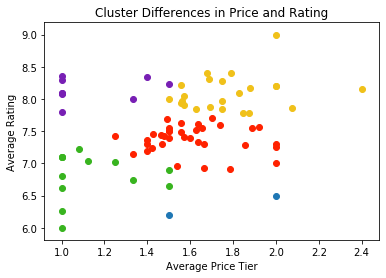

In [27]:
# Scatter, Color of clusters in the same as before
clusters = [0,1,2,3,4]
colors = ['#ff2200','#781fb4','#1f77b4','#38b41f','#f0c11a']
for cluster in clusters:
    subset = seattle_merged_PnR[seattle_merged_PnR['Cluster Labels'] == cluster]
    plt.scatter(subset['Venue Average Price'],subset['Venue Average Rating'],c=colors[cluster])
    plt.xlabel('Average Price Tier')
    plt.ylabel('Average Rating')
    plt.title('Cluster Differences in Price and Rating')